# Template for data science

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading the file train.csv

In [3]:
tr = pd.read_csv('train.csv')
tr.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Checking the information of dataset

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# To check how many unique values are present in each column

In [9]:
tr.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# To print unique values from the categorical columns

In [13]:
print('Survived :', tr.Survived.unique())
print('Pclass :', tr.Pclass.unique())
print('Gender :', tr.Sex.unique())
print('Embarked :', tr.Embarked.unique())

Survived : [0 1]
Pclass : [3 1 2]
Gender : ['male' 'female']
Embarked : ['S' 'C' 'Q' nan]


# In above  row 4 nan is included, to get rid of it use dropna()

In [14]:
print('Survived :', tr.Survived.unique())
print('Pclass :', tr.Pclass.unique())
print('Gender :', tr.Sex.unique())
print('Embarked :', tr.Embarked.dropna().unique())

Survived : [0 1]
Pclass : [3 1 2]
Gender : ['male' 'female']
Embarked : ['S' 'C' 'Q']


### Until this point explored the dataset
###
###
# Starting preprocessing

# Checking for duplicated
### if duplicate data is found we don't have any use of it, so simply delete it

In [18]:
tr.duplicated().sum()

0

# If duplicates are present then use below code to remove them

In [20]:
tr.drop_duplicates(inplace=True)

# Dealing with missing values

## Step 1 : Chceking missing values present or not 

In [21]:
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Way of dealing with missing values is diffrent in diffrent situations
### First situation : If number of values in a cloumn is very large wrt to total values then dropping coloumn is a suitable stratergy

In [22]:
# here in the above data cabin is missing 687 values out of 891, 
# there is no way we can deal precisly with so many missing values
# in this case better to drop it

#to delete a column use
tr.drop('Cabin', axis = 1, inplace = True)

In [23]:
#checking whether it is removed or not
tr.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


### Second situation : In case of numerical coloumn the missing values can be replaced by mean or medianm of that column

<Axes: xlabel='Age', ylabel='Density'>

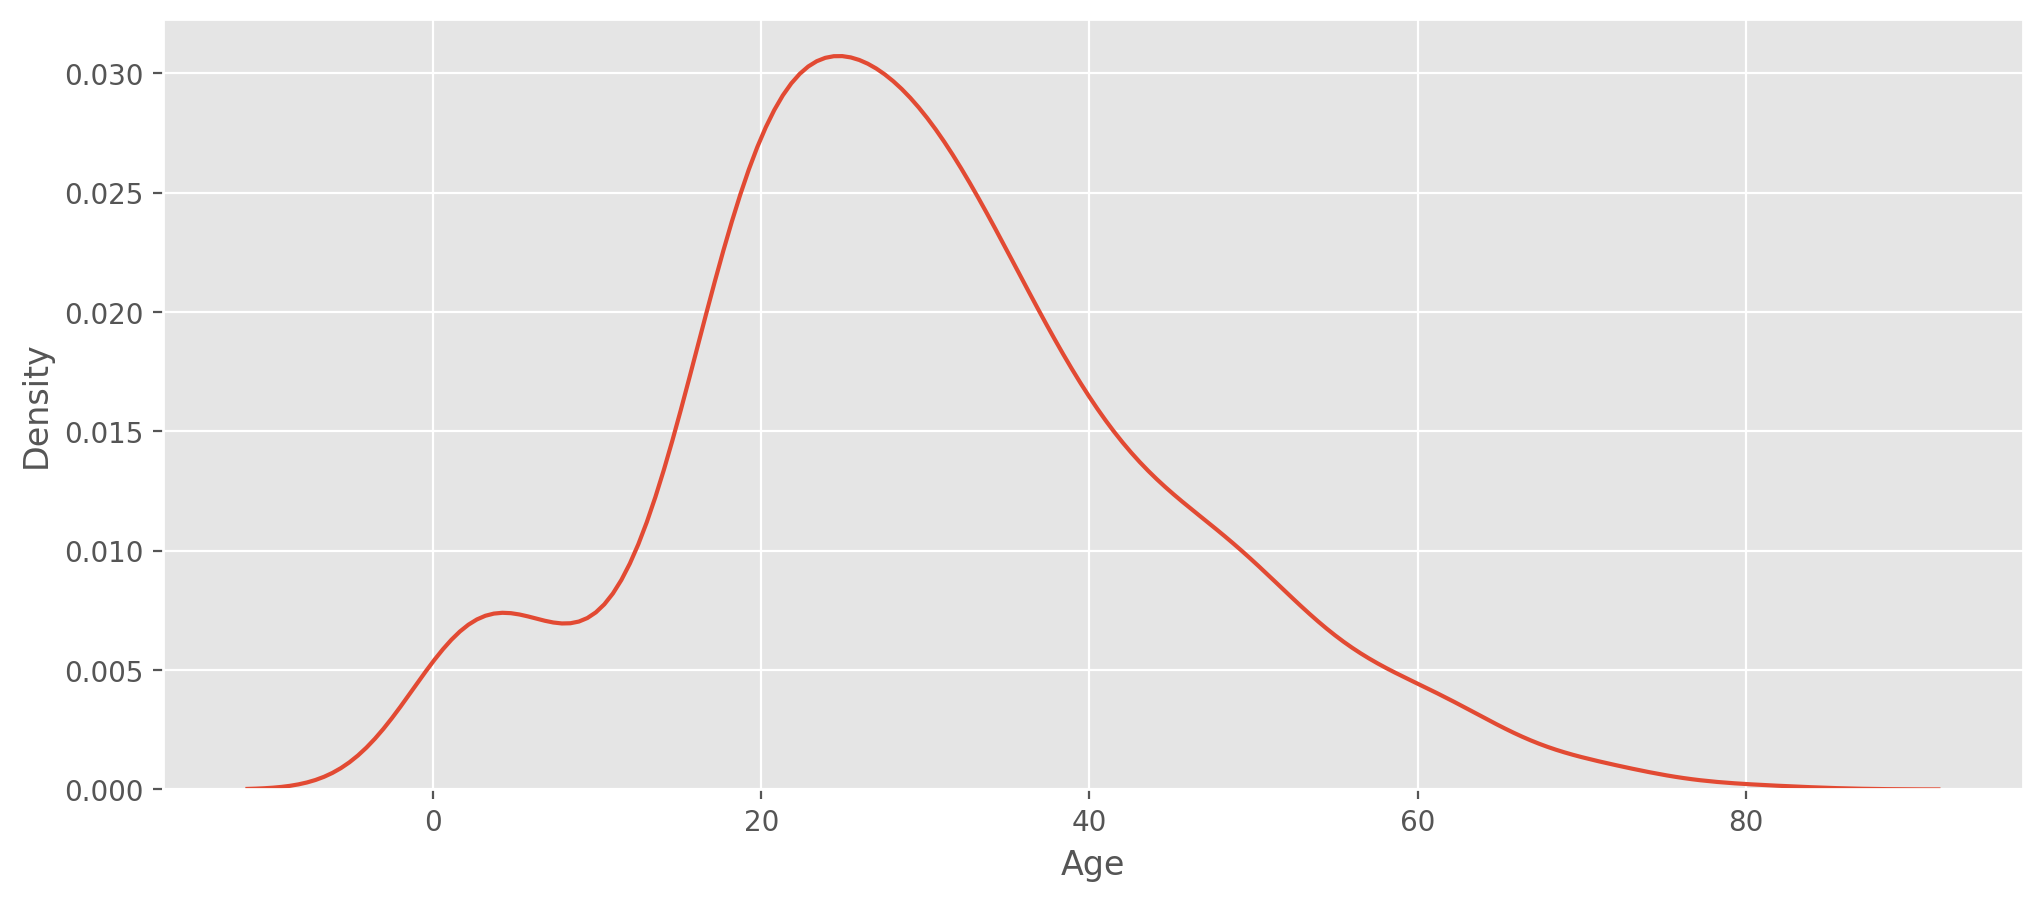

In [33]:
# mostly we use mean, rarely we use median.(if there are too much outlier then we use median, otherwiae simply use mean)
# for this we need to check the distribution, therefore use distplot

plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(tr.Age, hist=False)

In [35]:
# in this data the data is not too much skewd, therefor mean is ok, otherwise use median
#first calculate mean, then replace missing values with mean in age column

mean_age = tr.Age.mean()
print(mean_age)

29.69911764705882


In [38]:
# now replace the mean age in missing values of age column
# replace(old value, new value)
tr.Age.replace(np.nan, mean_age, inplace =True)

In [41]:
tr.Age.isnull().sum()
#now it should show zero missing values in age column

0

### if our data is categorical we cannot replace with mean or median because it simply does not make sense with categorical data 

### in such categorical column replace it with mode

In [42]:
#embarked column is categorical and it has some missing values, therfore find mode frist
#replace with most frequent one
mode_embarked = tr.Embarked.dropna().mode()
#mode function  returns a series in case to accomodate more than mode values
mode_embarked

0    S
Name: Embarked, dtype: object

In [44]:
# i want to extract S here because it is the most common
# to do so just mention zero in the end, if not done zero it will return a series
mode_embarked = tr.Embarked.dropna().mode()[0]
mode_embarked

'S'

In [45]:
tr.Embarked.replace(np.nan, mode_embarked, inplace=True)
tr.Embarked.isnull().sum()

0

### Strategies to deal with missing values
- If number of missing values in a column is very large wrt to total number of columns then dropping that column is a suitable strategy
- In numerical columns with missing values, mean or median can be replaced with the missing values
- if our data is categorical we cannot replace with mean or median because it simply does not make sense with categorical data, in such categorical column replace it with mode
- If number of missing values in a rows is very small wrt to total number of rows then it can be dropped
-             tr.dropna(inplce=True)

## What we are doing now is known as feature engineering
##  Sometimes we need to combine of seperate two or more columns
###### here in the data we have Sibsp and Parch instead create it as family members

In [67]:
#Creating new column family members by using Parch and SIbSP
tr['Family_members'] = tr.SibSp + tr.Parch

#deleting SibSp and Parch
tr.drop(['SibSp','Parch'], inplace=True, axis = 1)
#here axis = 1 should be specified because axis = 0 means rows, axis =1 means columns
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


#### from now we can start creating visualizations

# Exploaratory Data Analysis

### Q1 How many passengers did not survive

<Axes: ylabel='count'>

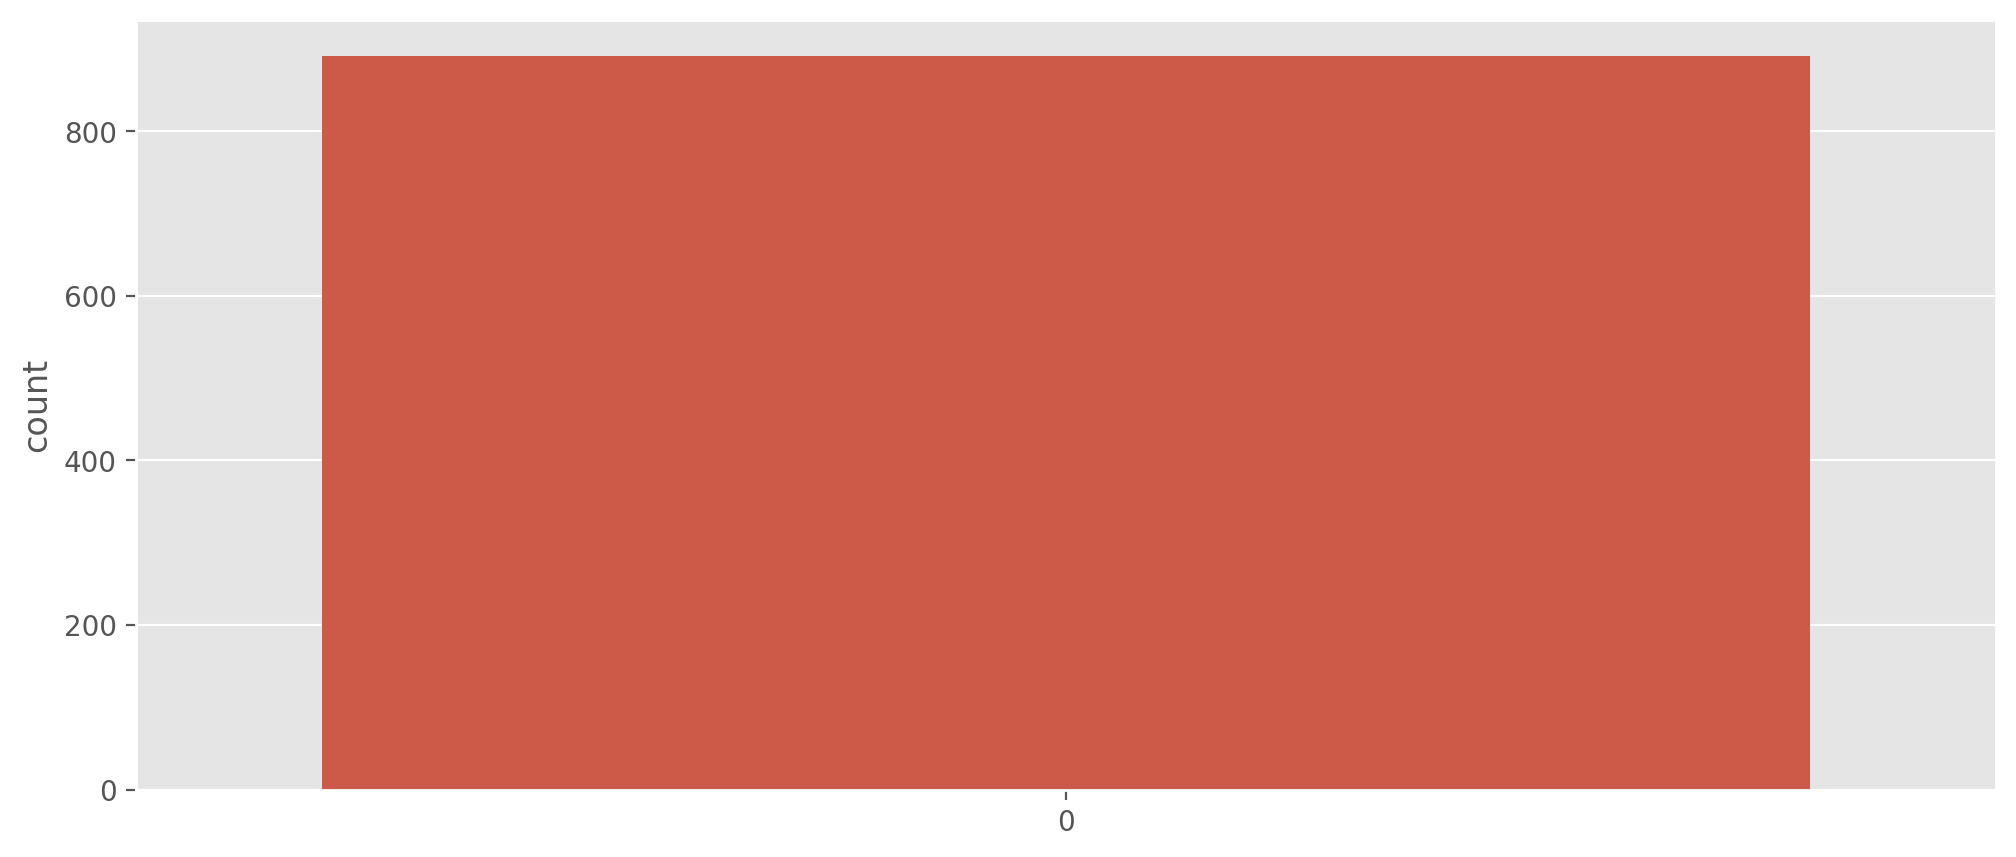

In [26]:
# Exploratory data analysis means simply understanding what is our data, what is doing what, how everything is affecting, 
# depends on data depends on question, learn it. it's diffrent for diffrent situation

# How many passengers did not survive
# Add all the values in survived column is one answer
# Use countplot, since it is a categorical column

plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(tr.Survived)


<Axes: xlabel='Survived', ylabel='count'>

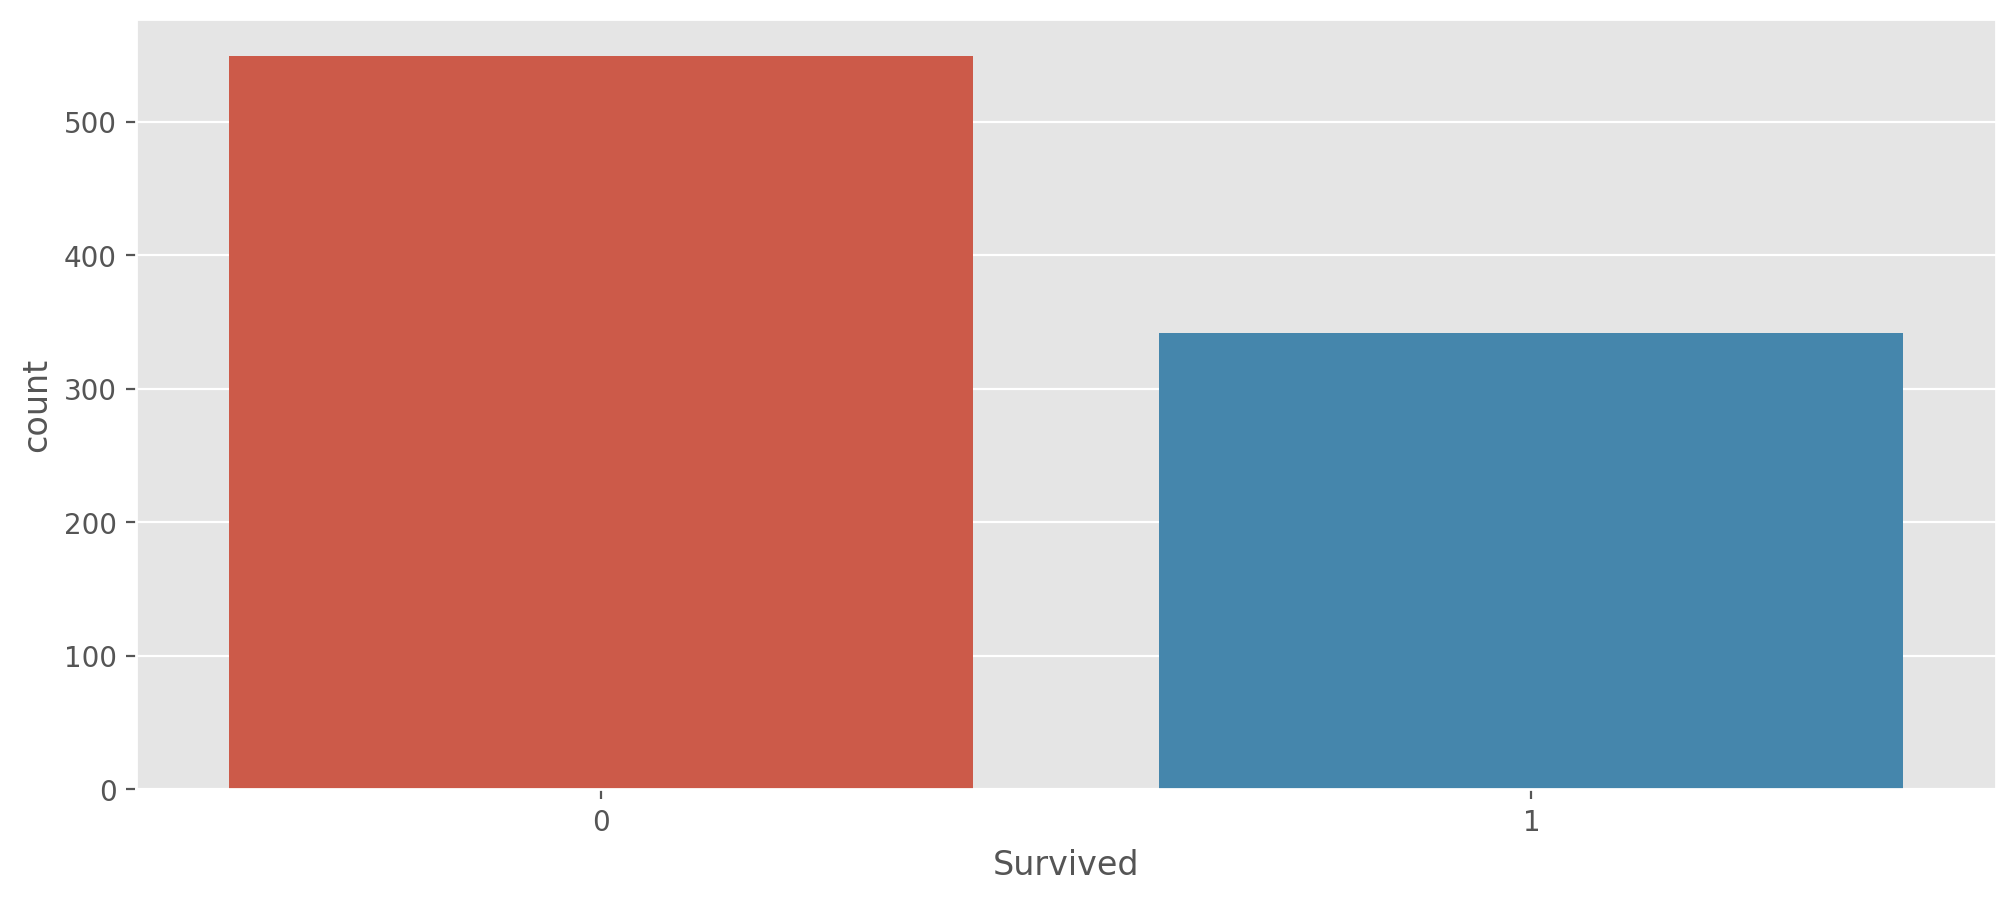

In [27]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Survived', data = tr)

In [18]:
# when we do data analysis along with visualization we need to do calculations also
tr.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
# to print this data then we use normalization, then if we multiply by 100 we will get percentages
tr.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [21]:
#to print percentages
survival_ratio = tr.Survived.value_counts(normalize=True)
print('Dead     :',survival_ratio[0]*100)
print('Survived :',survival_ratio[1]*100)

Dead     : 61.61616161616161
Survived : 38.38383838383838


In [24]:
# to round values
#to print percentages
survival_ratio = tr.Survived.value_counts(normalize=True)
print('Dead     :',round(survival_ratio[0]*100,2))
print('Survived :',round(survival_ratio[1]*100,2))

Dead     : 61.62
Survived : 38.38


# it completed the answer to first question, visually as well as neumerically

## Q2 How many males and females survived?

<Axes: xlabel='Sex', ylabel='Survived'>

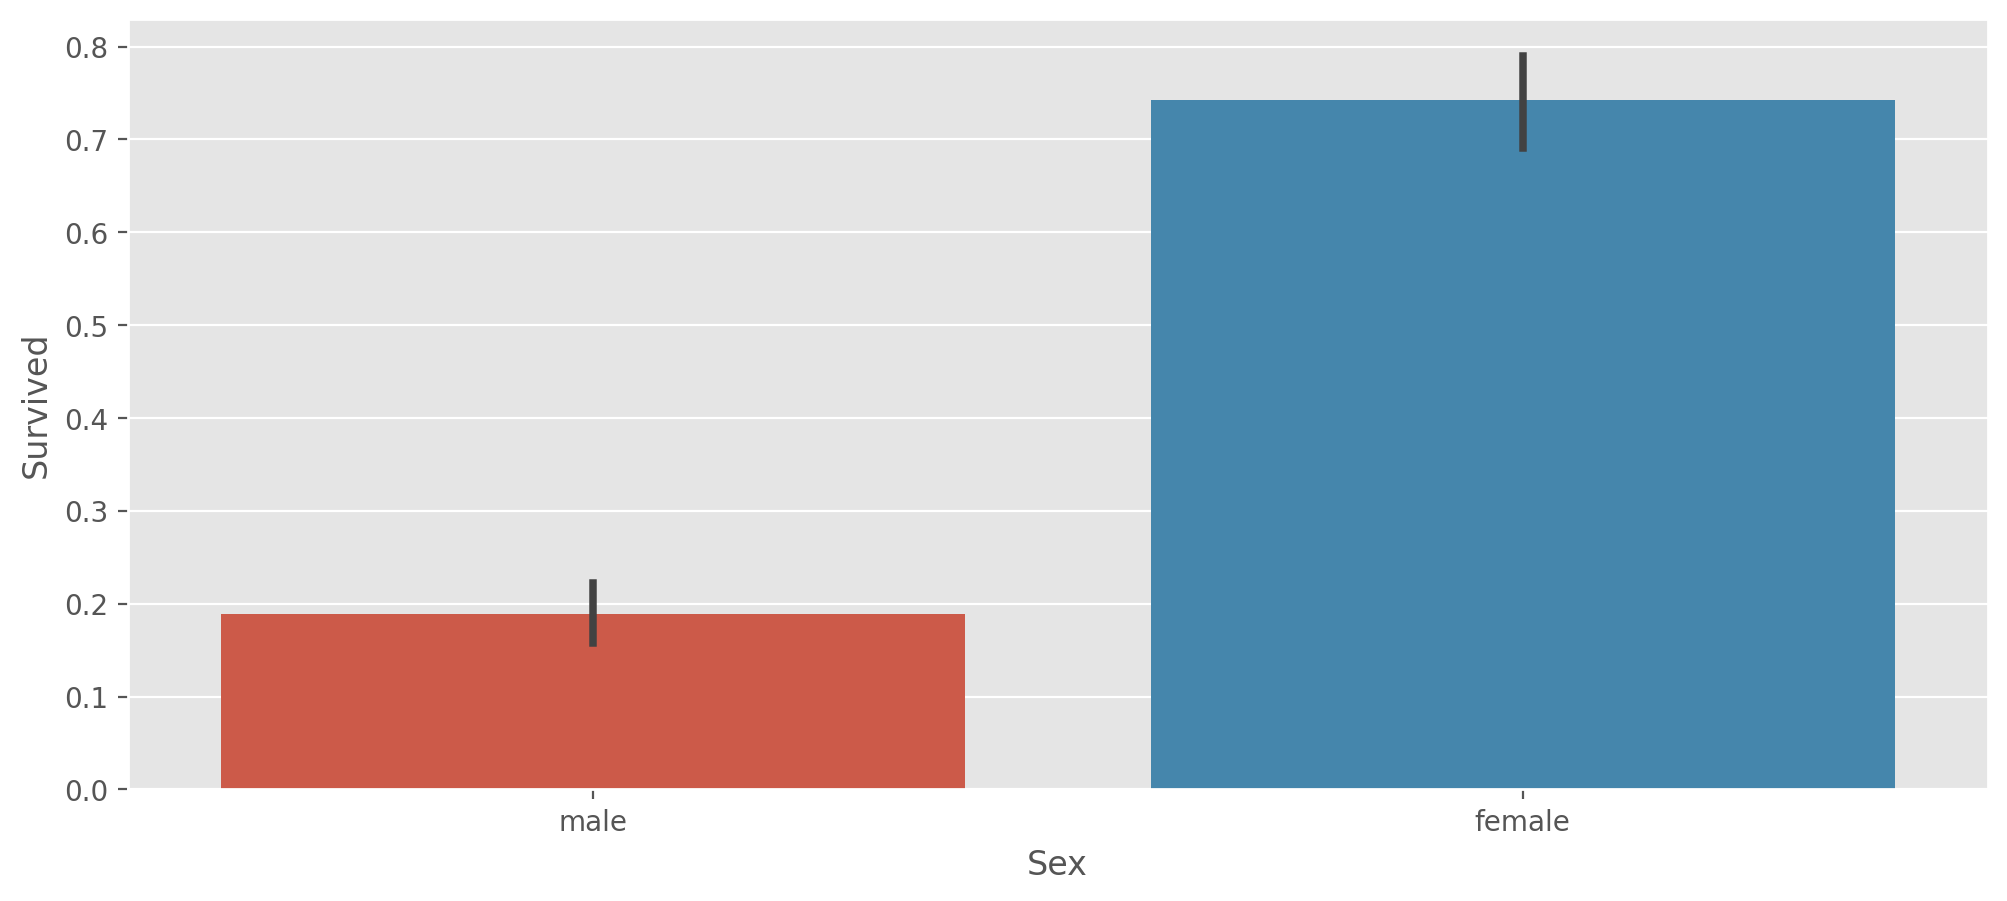

In [8]:
# survival with respect to gender,(Analysing gender and survival)

#what i do?
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(y=tr.Survived,x=tr.Sex)

<Axes: xlabel='Sex', ylabel='count'>

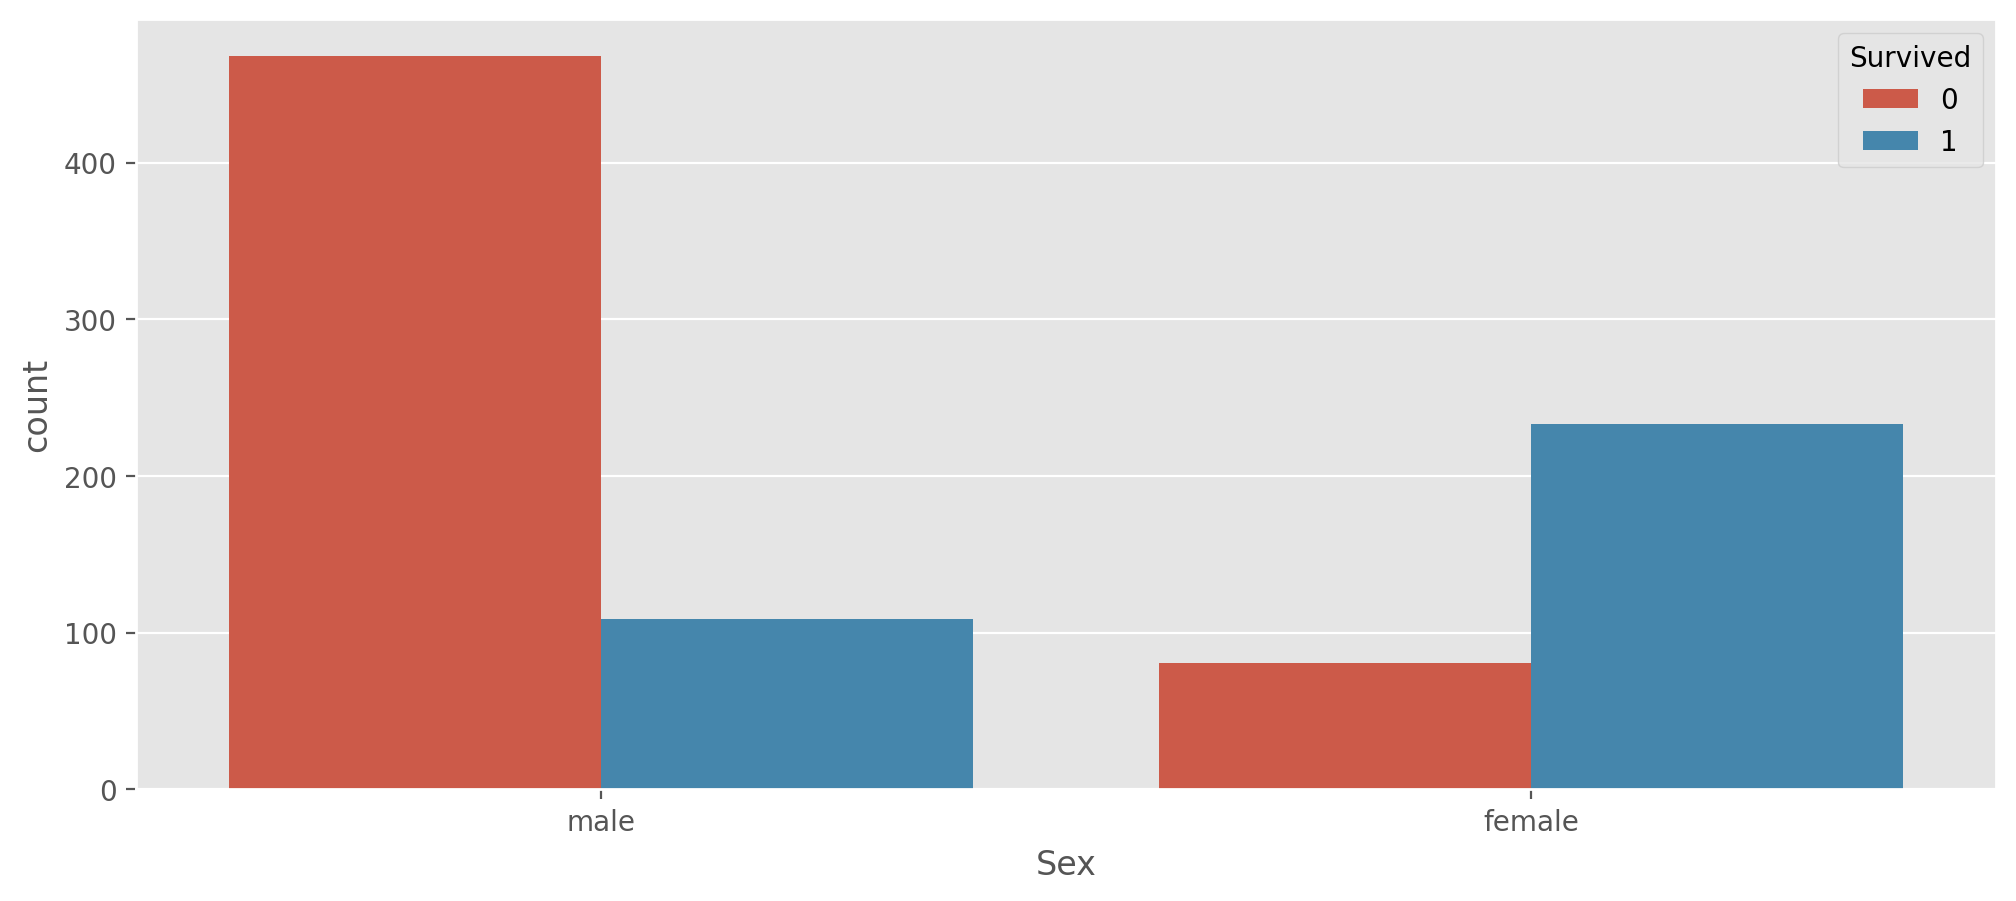

In [9]:
# what utkarsh has done
# taken note and analysed categorical orneumerical, both are categorical
# decided to use countplot with hue

plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Sex', hue = 'Survived', data = tr)


In [33]:
# from the above visualizations we can say the females survived much more

#to do calculations neumerically use value_counts + groupby
tr.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [34]:
#to print percentages
save_rate = tr.groupby('Sex').Survived.value_counts(normalize = True)

print('FeMale: Survived       :', round(save_rate[0]*100,2))
print('        Not Survived   :', round(save_rate[1]*100,2))
print('Male  : Survived       :', round(save_rate[3]*100,2))
print('        Not Survived   :', round(save_rate[2]*100,2))

FeMale: Survived       : 74.2
        Not Survived   : 25.8
Male  : Survived       : 18.89
        Not Survived   : 81.11


In [35]:
#Since it is series we can use it like this also, in index use 1 for survived, 0 for not survived
#this is wrt to total passengers, not out of 100

print('FeMale: Survived       :', round(save_rate['female'][1]*100,2))
print('        Not Survived   :', round(save_rate['female'][0]*100,2))
print('Male  : Survived       :', round(save_rate['male'][1]*100,2))
print('        Not Survived   :', round(save_rate['male'][0]*100,2))

FeMale: Survived       : 74.2
        Not Survived   : 25.8
Male  : Survived       : 18.89
        Not Survived   : 81.11


# Let's we want this survival info to be displayed in a pie chart
# we create multiple piecharts depending upon the categories

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64
Survived
0    0.257962
1    0.742038
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Female survival')

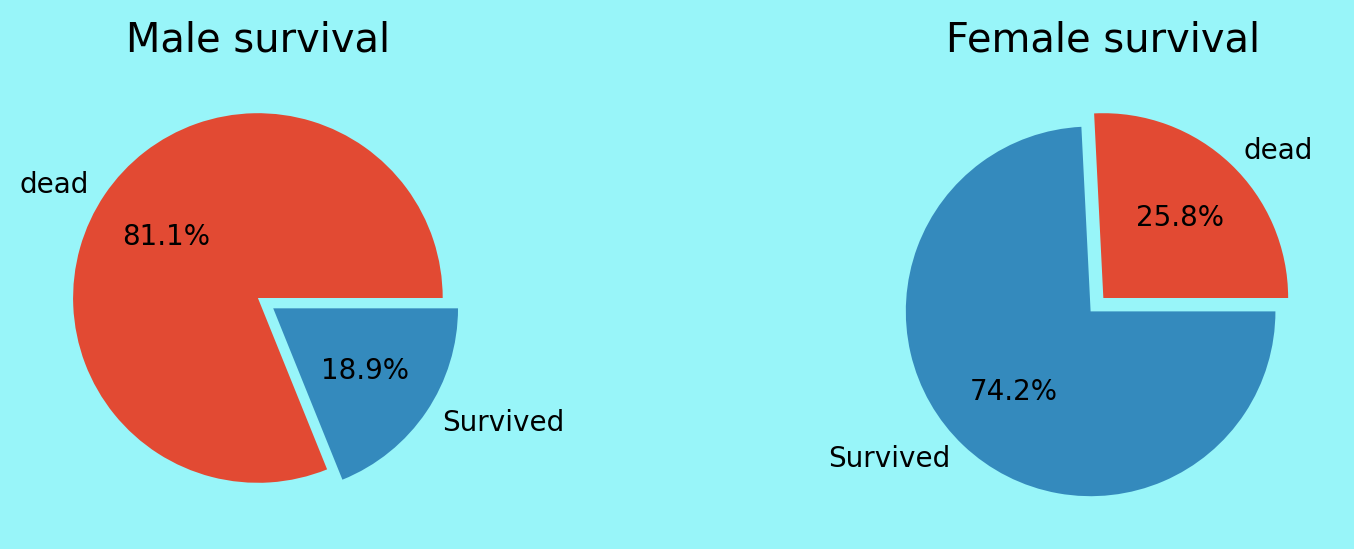

In [37]:
# To display the information of males and females seperatly, extract them first
# for that we have to arrange data according to index
# sorting step is important
save_rate = save_rate.sort_index()

males = save_rate['male']
print(males)
females = save_rate['female']
print(females)
labels = ['dead','Survived']

plt.figure(figsize = (10,3), dpi = 200, facecolor='#98F5F9')
plt.subplot(1,2,1)
plt.pie(males, autopct= '%1.1f%%', labels= labels, explode = [0,0.1])
plt.title('Male survival')
plt.subplot(1,2,2)
plt.pie(females, autopct= '%1.1f%%', labels= labels, explode = [0,0.1])
plt.title('Female survival')

# Q3 Can we say passenger class takes part in survival 

<Axes: xlabel='Pclass', ylabel='count'>

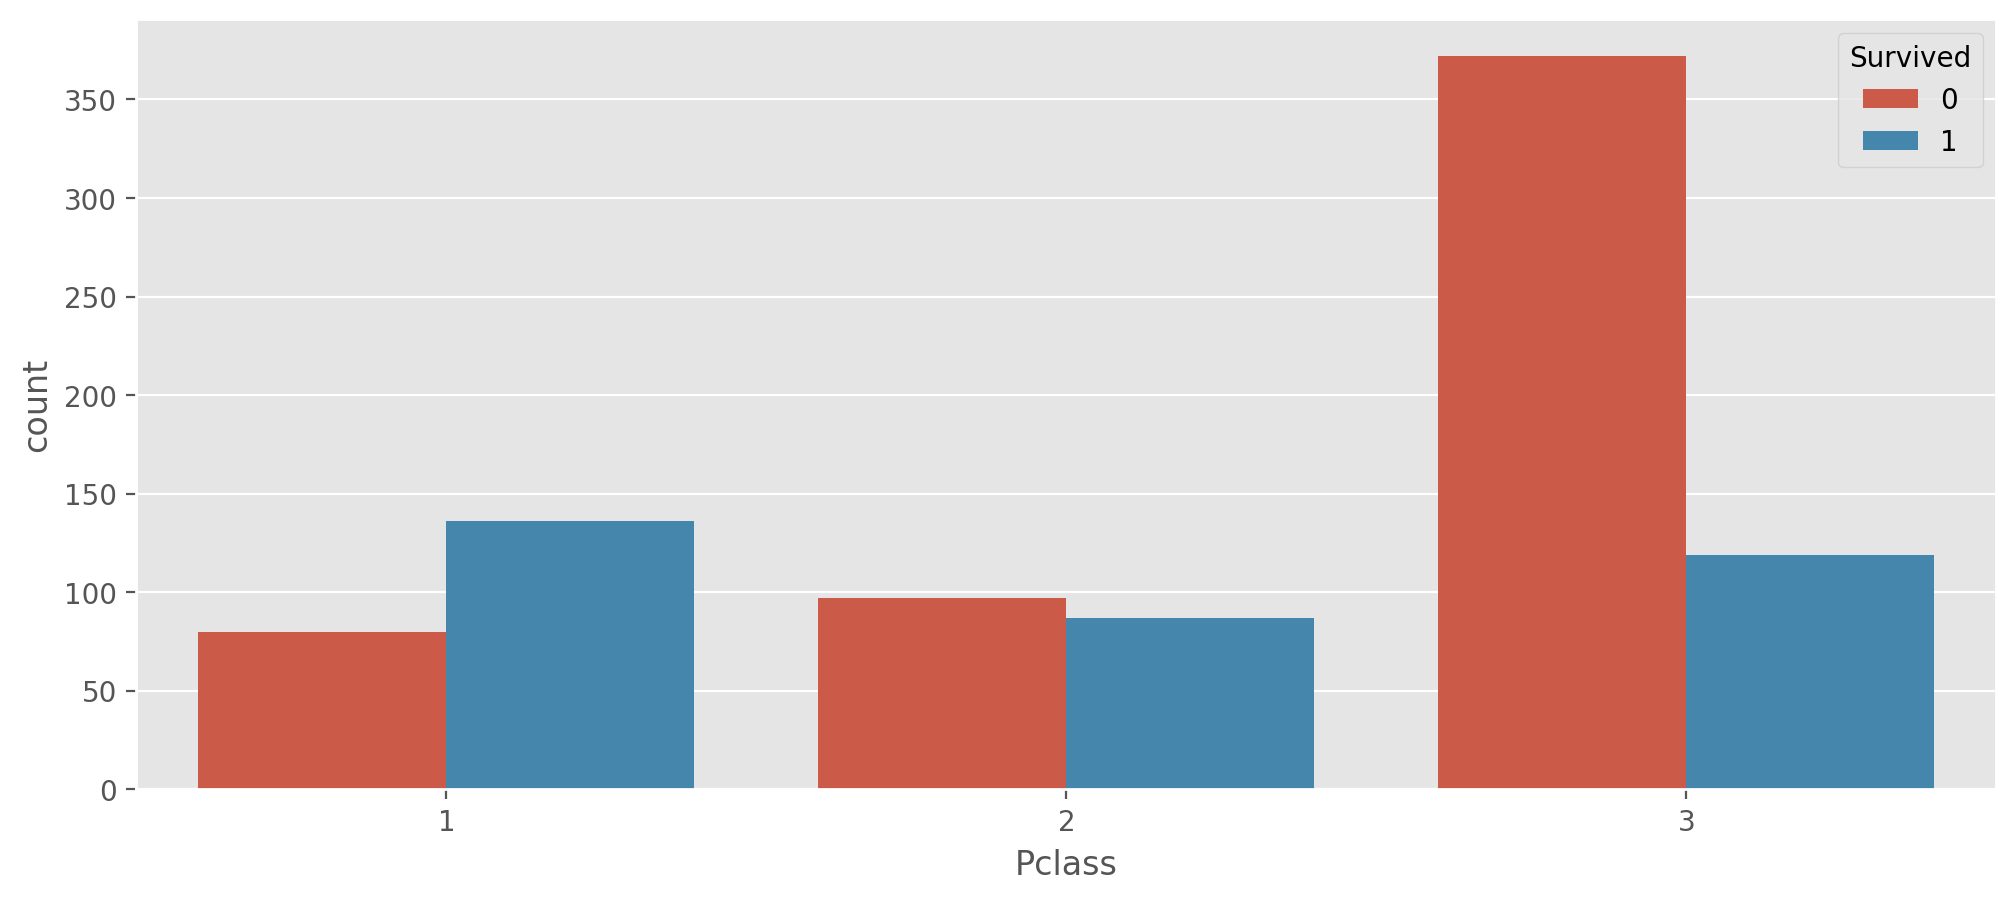

In [50]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Pclass', hue = 'Survived', data = tr)

In [40]:
sur_class = tr.groupby('Pclass').Survived.value_counts(normalize=True)
print('1: Survived       :', round(sur_class[1][1]*100,2),'%')
print('1: Not Survived   :', round(sur_class[1][0]*100,2),'%')
print('2: Survived       :', round(sur_class[2][1]*100,2),'%')
print('2: Not Survived   :', round(sur_class[2][0]*100,2),'%')
print('3: Survived       :', round(sur_class[3][1]*100,2),'%')
print('3: Not Survived   :', round(sur_class[3][0]*100,2),'%')

1: Survived       : 62.96 %
1: Not Survived   : 37.04 %
2: Survived       : 47.28 %
2: Not Survived   : 52.72 %
3: Survived       : 24.24 %
3: Not Survived   : 75.76 %


Text(0.5, 1.0, 'Passenger class 3')

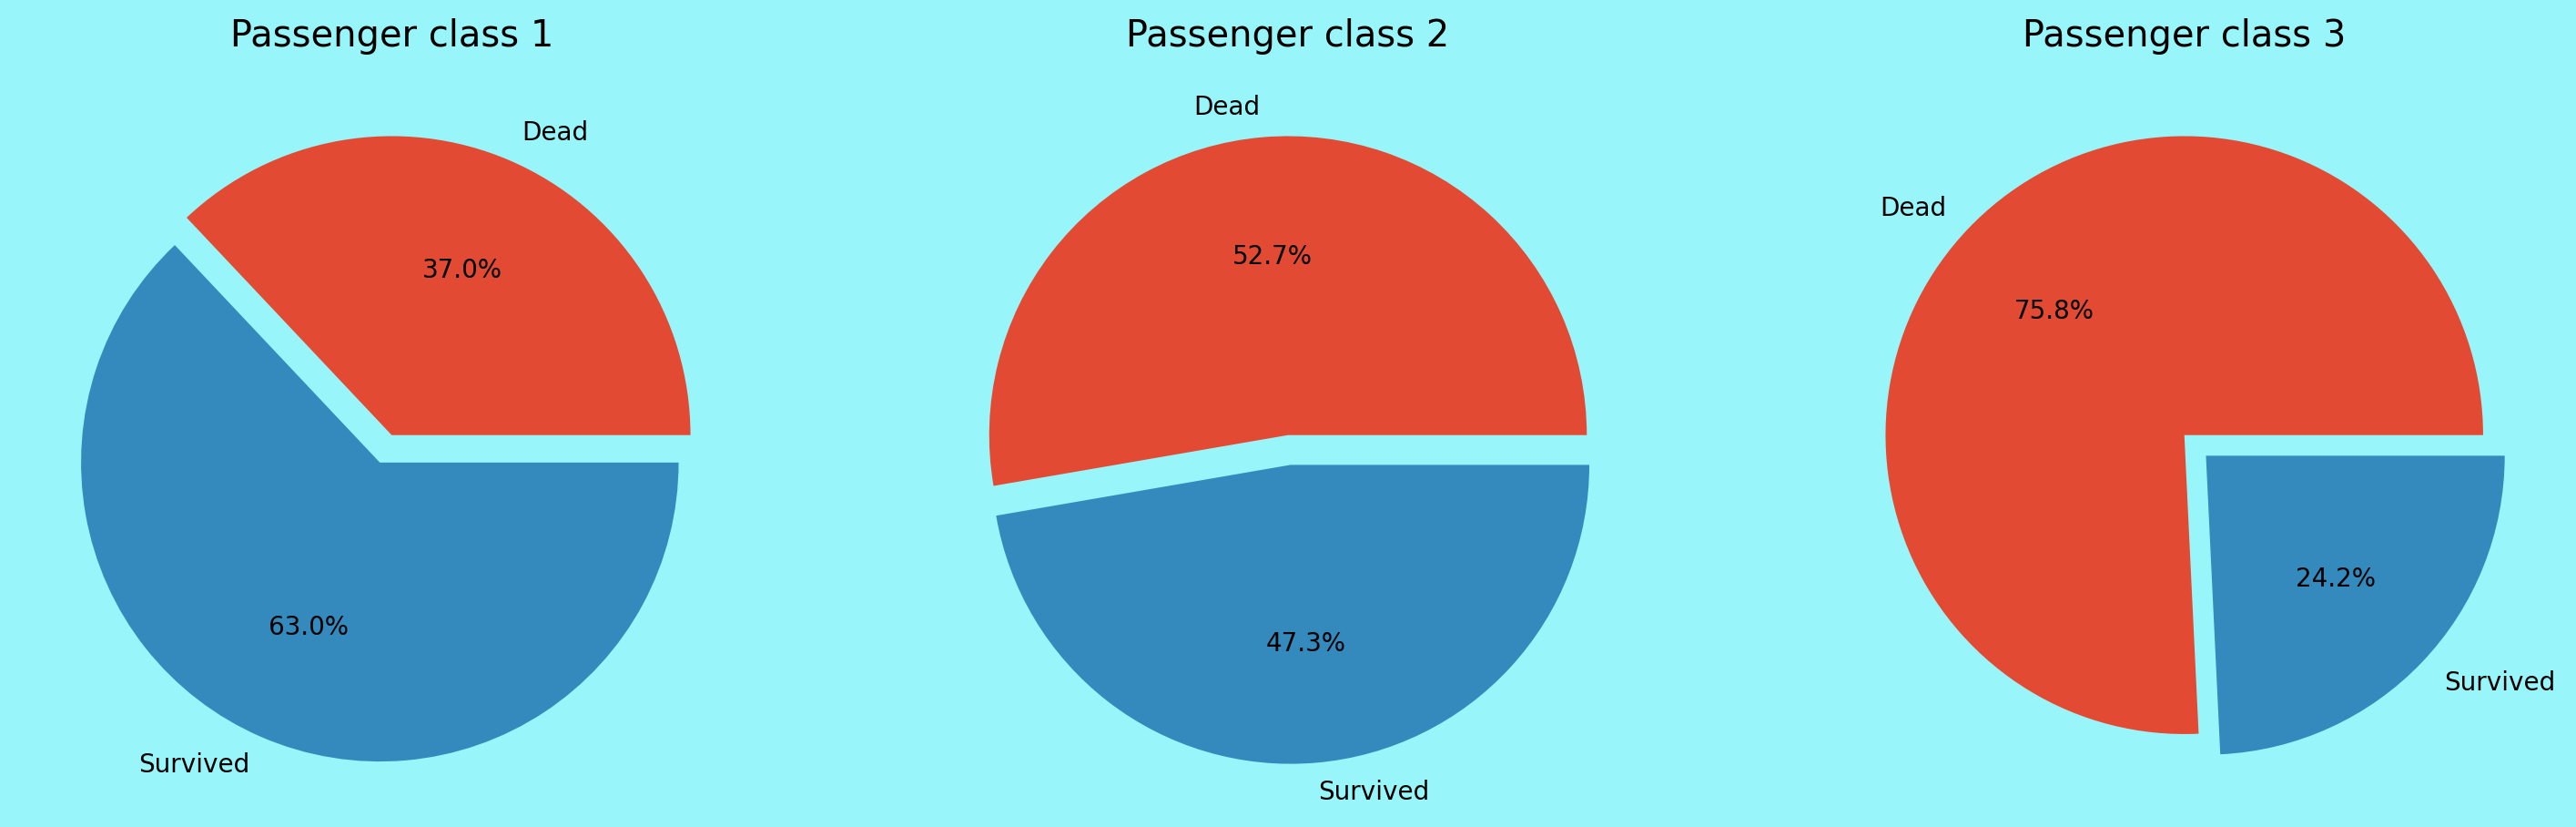

In [41]:
sur_class = sur_class.sort_index()

pclass1, pclass2, pclass3 = sur_class[1],sur_class[2],sur_class[3]
labels =['Dead','Survived']

plt.figure(figsize = (18,6), dpi = 200, facecolor='#98F5F9')
plt.subplot(1,3,1)
plt.pie(pclass1, autopct= '%1.1f%%', labels= labels, explode = [0,0.1])
plt.title('Passenger class 1')
plt.subplot(1,3,2)
plt.pie(pclass2, autopct= '%1.1f%%', labels= labels, explode = [0,0.1])
plt.title('Passenger class 2')
plt.subplot(1,3,3)
plt.pie(pclass3, autopct= '%1.1f%%', labels= labels, explode = [0,0.1])
plt.title('Passenger class 3')

# Lets take embarked and analyse

<Axes: xlabel='Embarked', ylabel='count'>

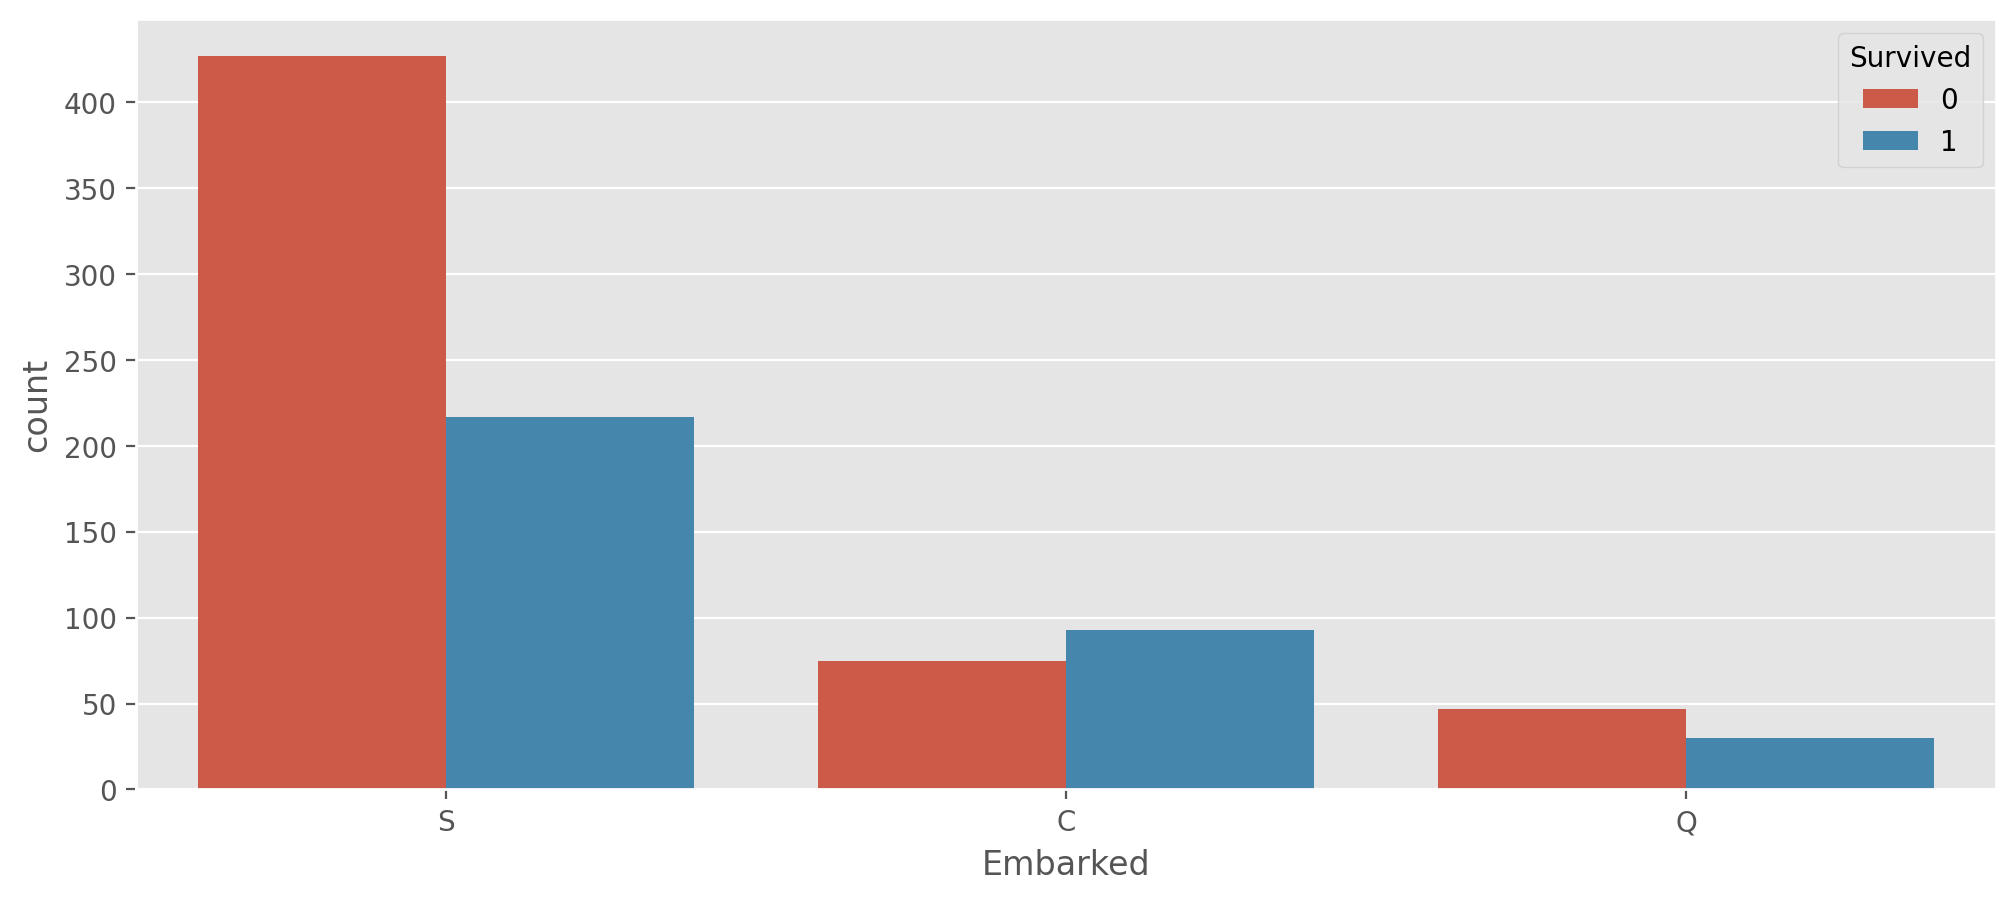

In [4]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Embarked', hue = 'Survived', data = tr)

In [7]:
sur_Embarked = tr.groupby('Embarked').Survived.value_counts(normalize=True)
print('S: Survived       :', round(sur_Embarked['S'][1]*100,2),'%')
print('S: Not Survived   :', round(sur_Embarked['S'][0]*100,2),'%')
print('C: Survived       :', round(sur_Embarked['C'][1]*100,2),'%')
print('C: Not Survived   :', round(sur_Embarked['C'][0]*100,2),'%')
print('Q: Survived       :', round(sur_Embarked['Q'][1]*100,2),'%')
print('Q: Not Survived   :', round(sur_Embarked['Q'][0]*100,2),'%')

S: Survived       : 33.7 %
S: Not Survived   : 66.3 %
C: Survived       : 55.36 %
C: Not Survived   : 44.64 %
Q: Survived       : 38.96 %
Q: Not Survived   : 61.04 %


# Q4 How fair affects passenger class?

<Axes: xlabel='Pclass', ylabel='Fare'>

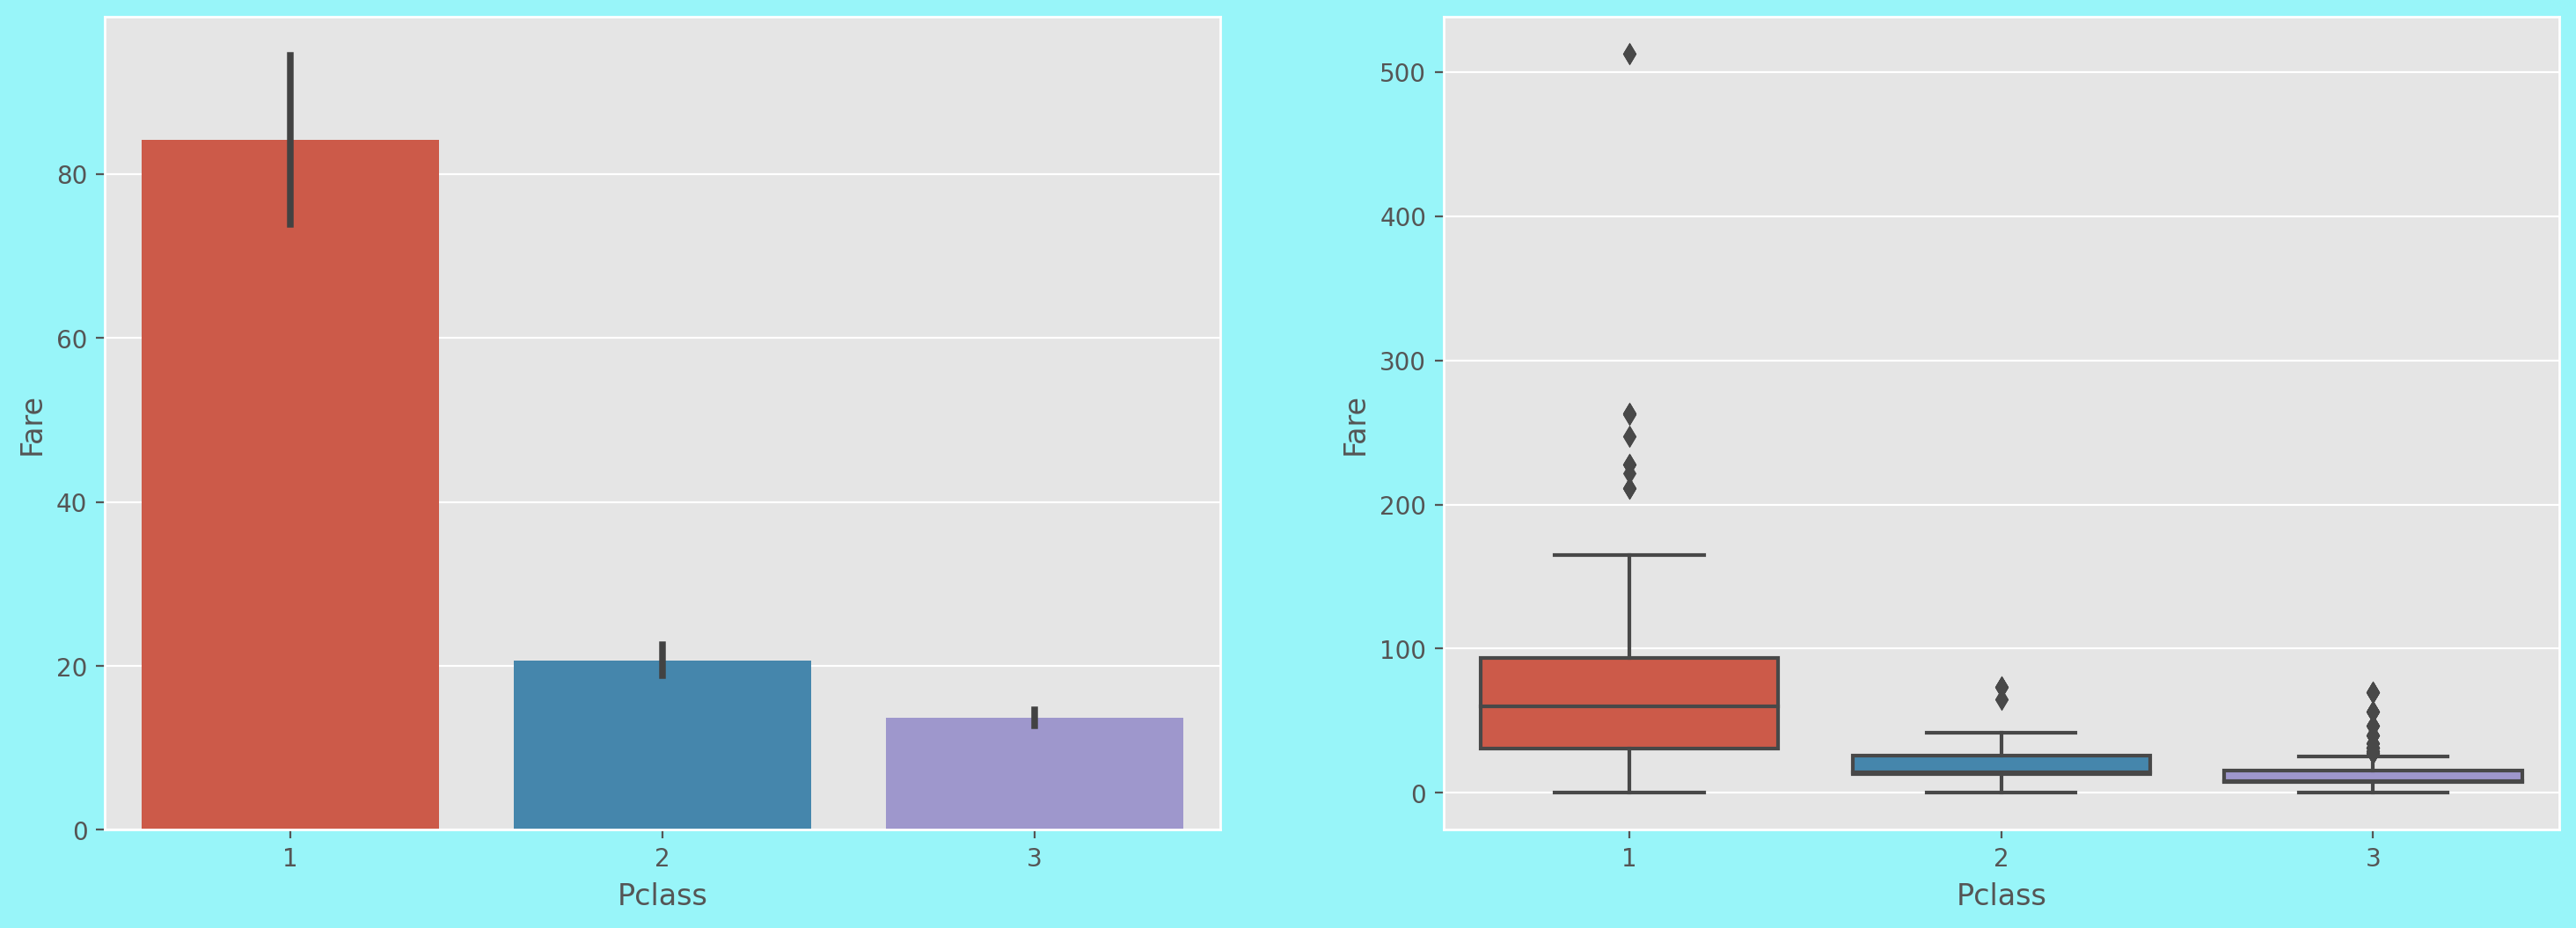

In [46]:
# Comparing fare and passenger class
# fair is neumerical, passenger class categorical
# The choices we have are barplot and boxplot

plt.figure(figsize = (18,6), dpi = 200, facecolor='#98F5F9')
plt.subplot(1,2,1)
sns.barplot(x='Pclass',y='Fare', data=tr)
plt.subplot(1,2,2)
sns.boxplot(x='Pclass',y='Fare', data=tr)

<Axes: xlabel='Survived', ylabel='Fare'>

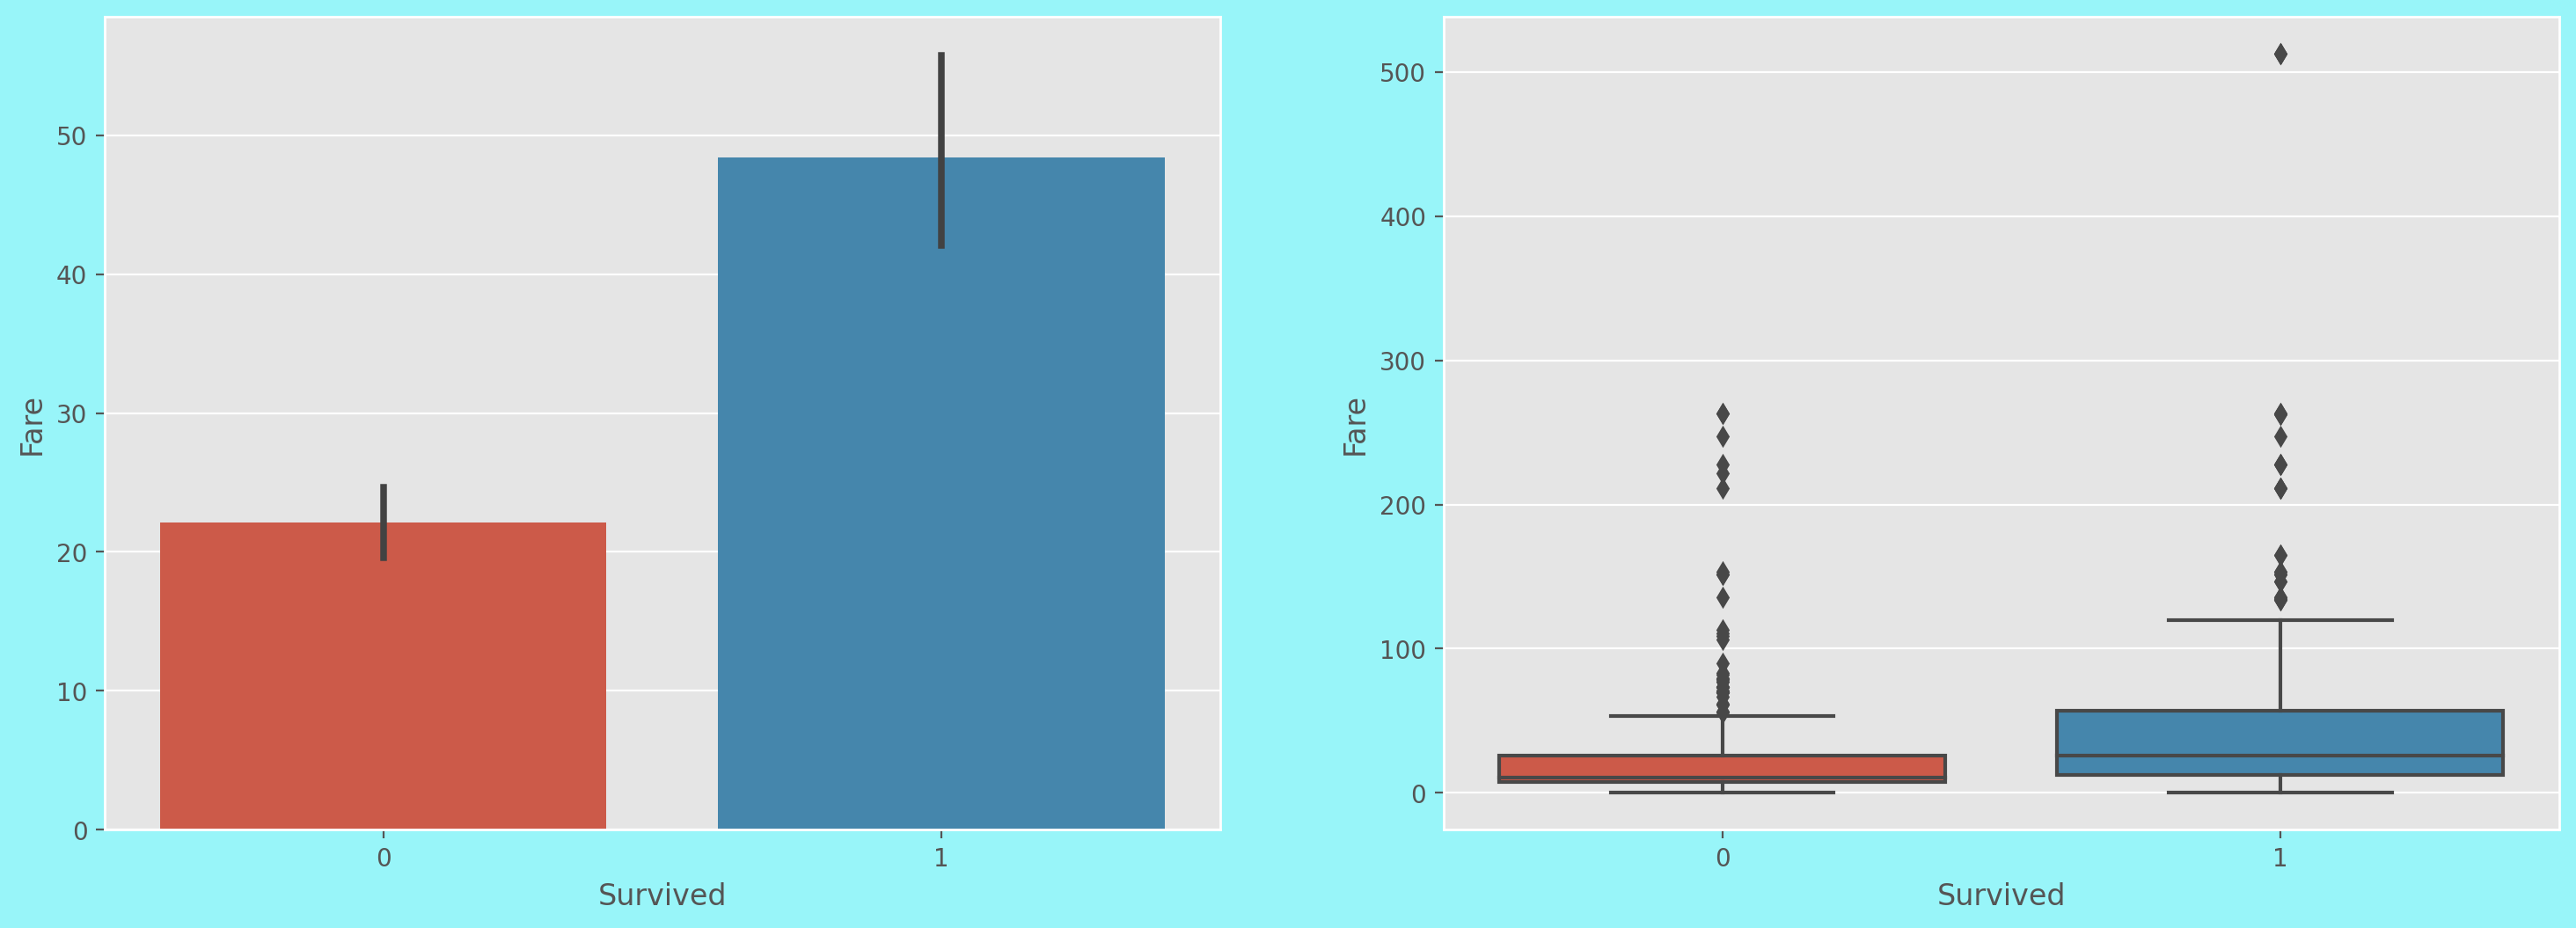

In [47]:
#fair with survival

plt.figure(figsize = (18,6), dpi = 200, facecolor='#98F5F9')
plt.subplot(1,2,1)
sns.barplot(x='Survived',y='Fare', data=tr)
plt.subplot(1,2,2)
sns.boxplot(x='Survived',y='Fare', data=tr)

In [48]:
# in the above figure we have seen some dot on above all, who are these rich kids
# we will be intresting to know about them

# to extract info about these rich kids
# Use Conditional qurying
tr[tr.Fare>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# Analyse age seperatly
# Q: Around what age most of our travellers are

<Axes: ylabel='Age'>

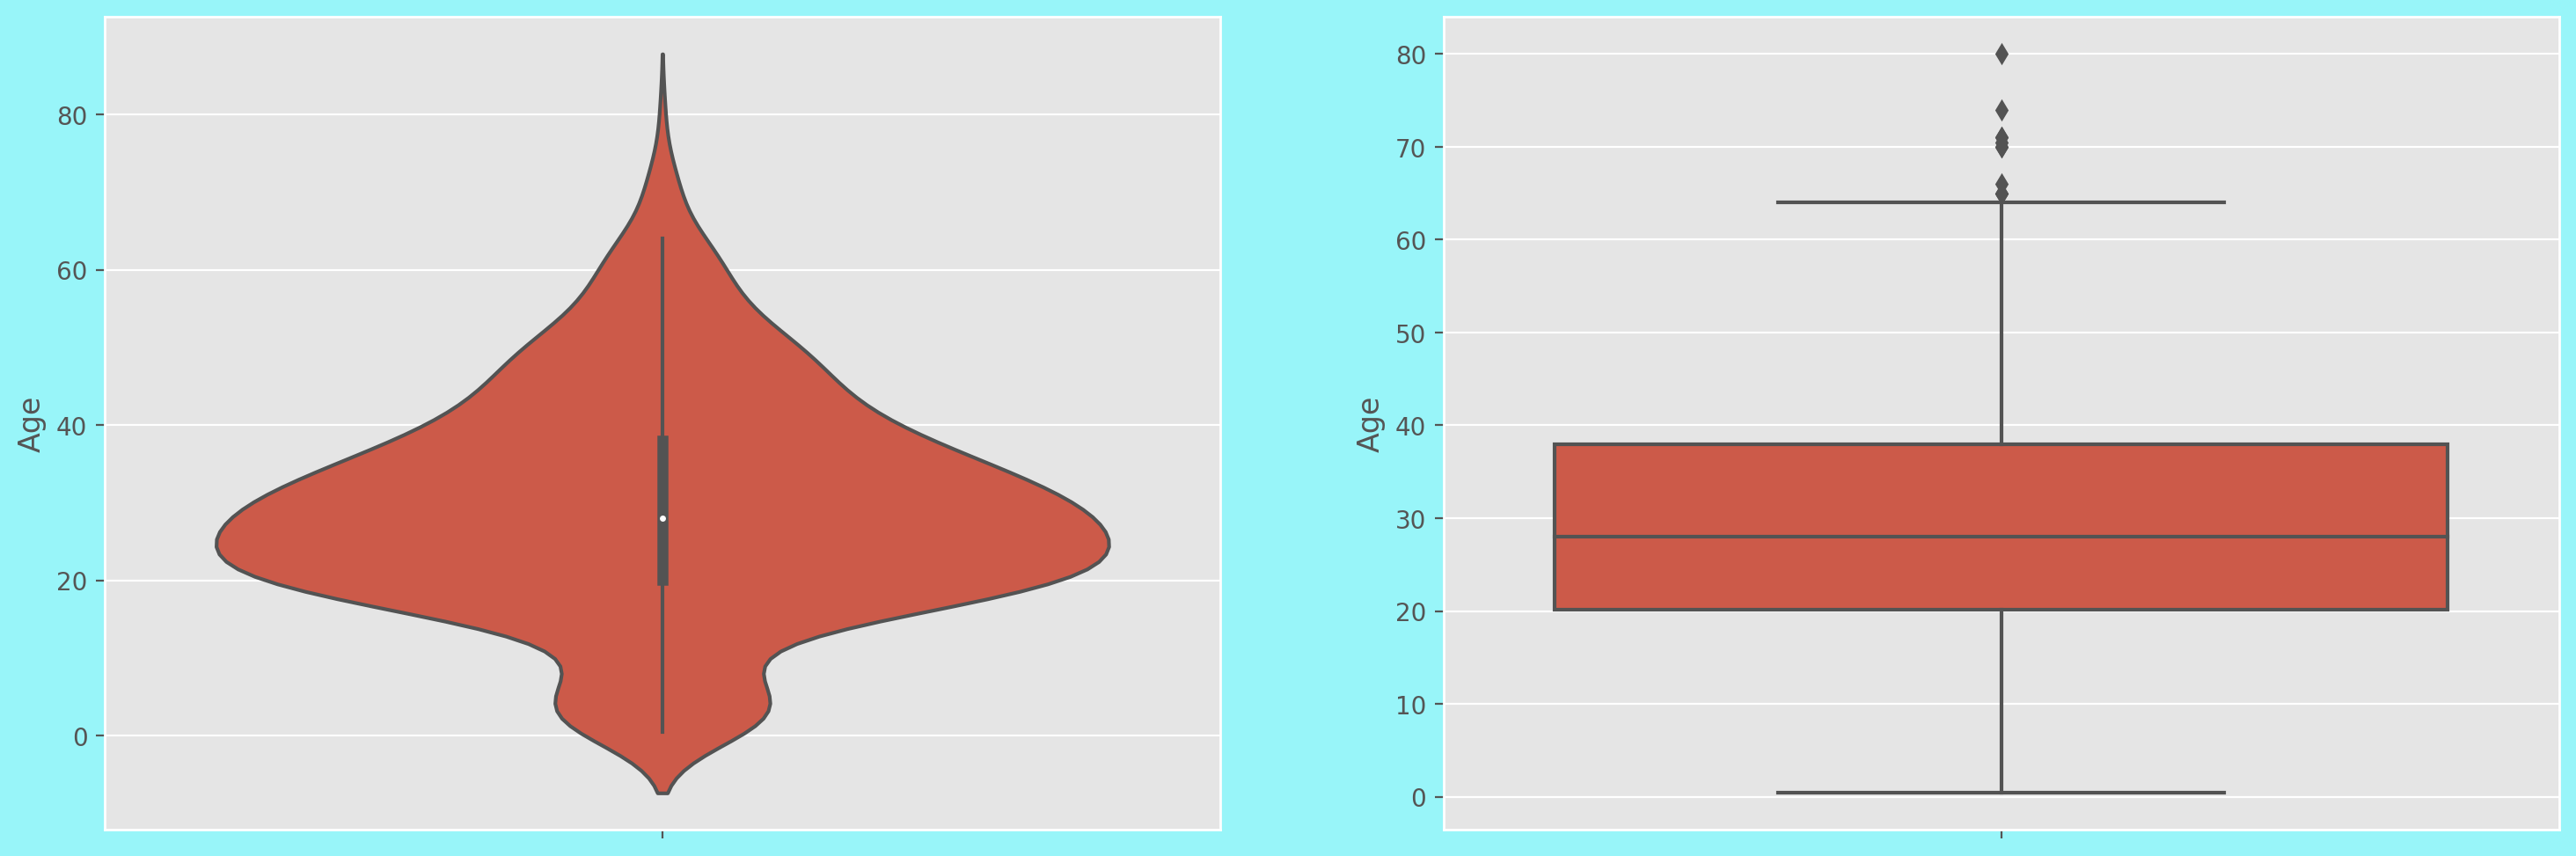

In [51]:
# among the travellers what age is the highest
# for it distplot and violin plot are best
# violinplot is the symmetrical form of distplot, hence we can only use violinplot

plt.figure(figsize = (18,6), dpi = 200, facecolor='#98F5F9')
plt.subplot(1,2,1)
sns.violinplot(y='Age', data=tr)
plt.subplot(1,2,2)
sns.boxplot(y='Age', data=tr)

# Age wrt to survival

<Axes: xlabel='Survived', ylabel='Age'>

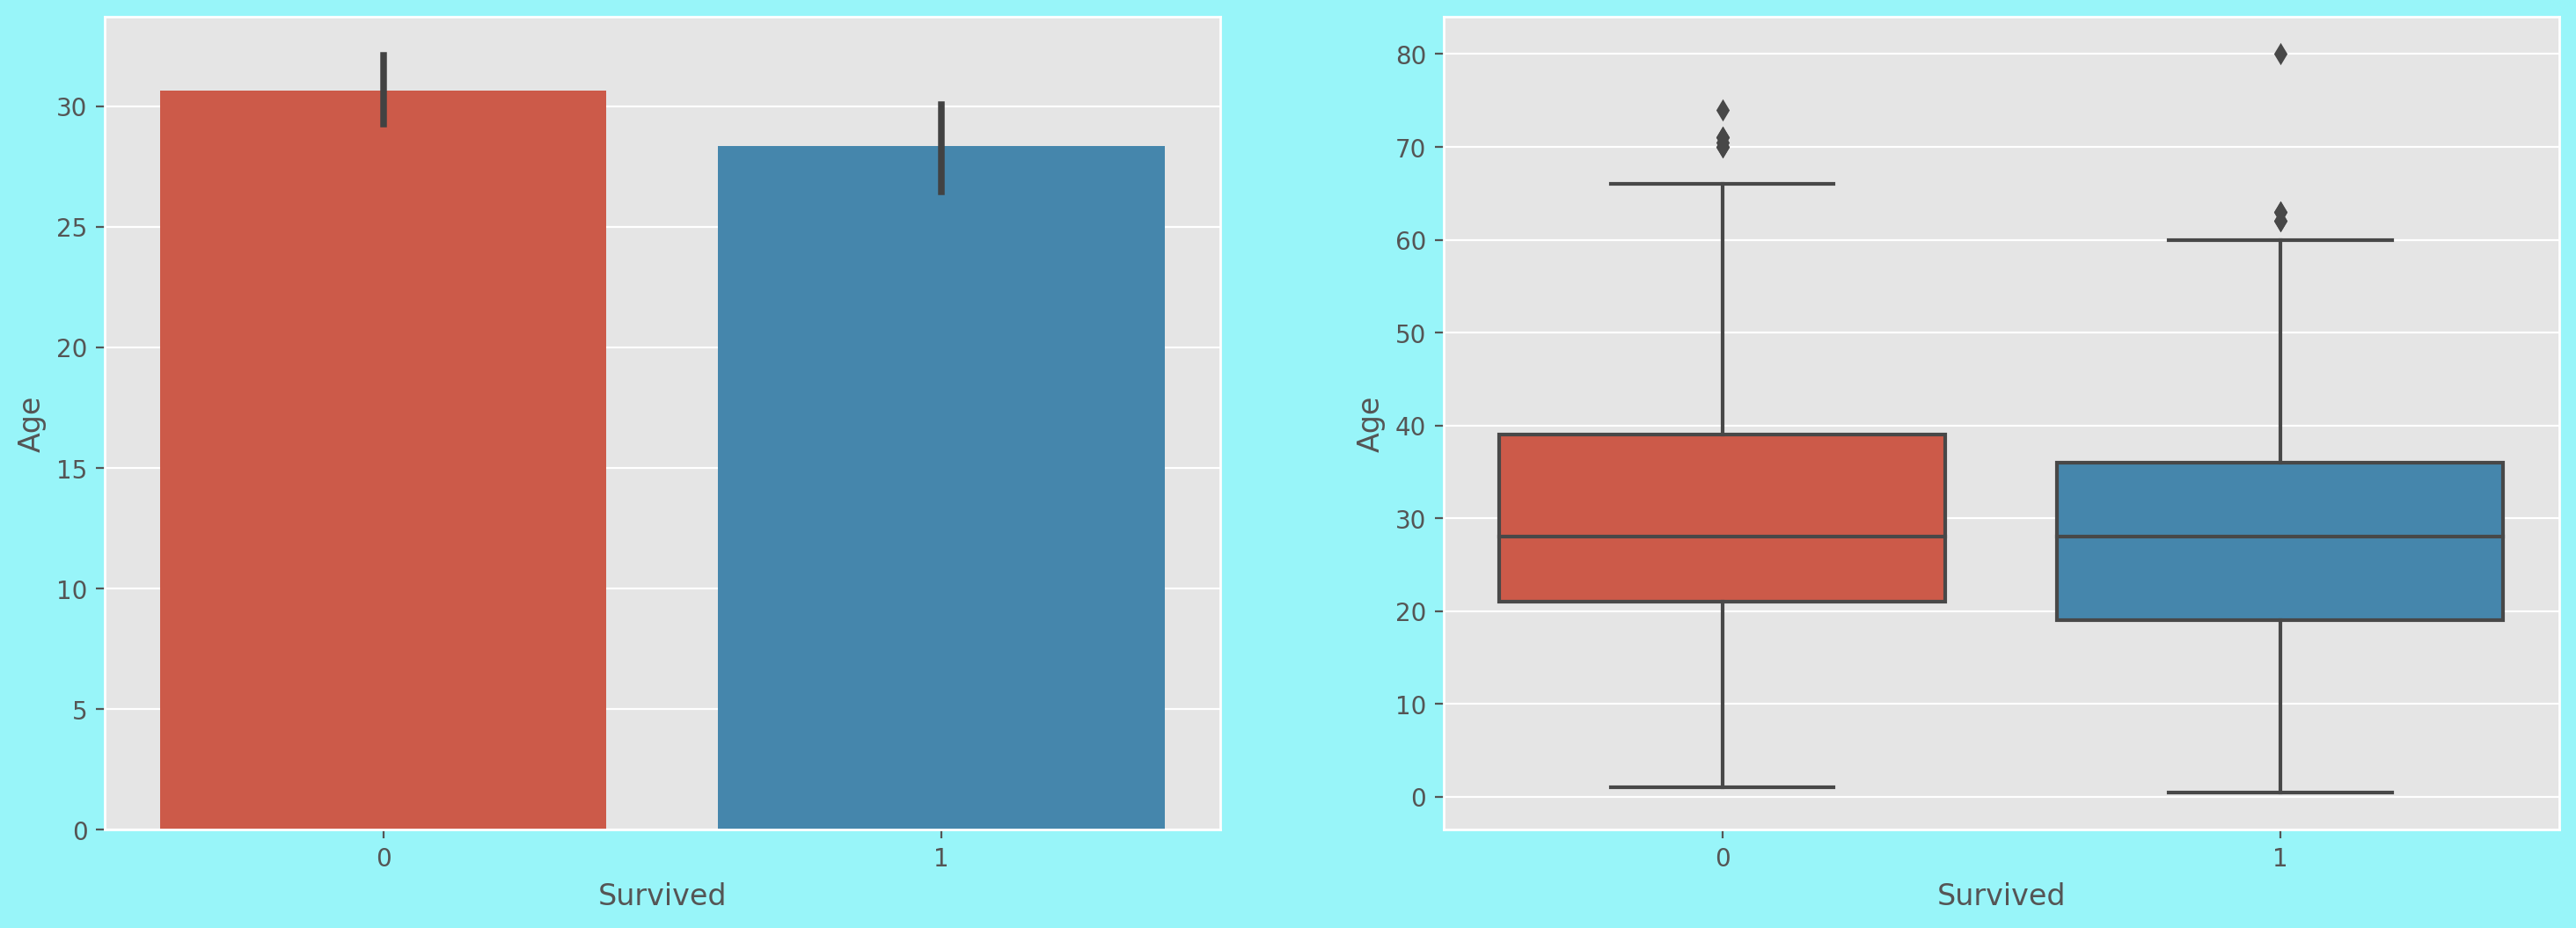

In [53]:
plt.figure(figsize = (18,6), dpi = 200, facecolor='#98F5F9')
plt.subplot(1,2,1)
sns.barplot(x='Survived',y='Age', data=tr)
plt.subplot(1,2,2)
sns.boxplot(x='Survived',y='Age', data=tr)

In [65]:
# from above fig we can say that both of them are almost similar
# hence age is not affecting survival

# Family memebers and survival

<Axes: xlabel='Family_members', ylabel='count'>

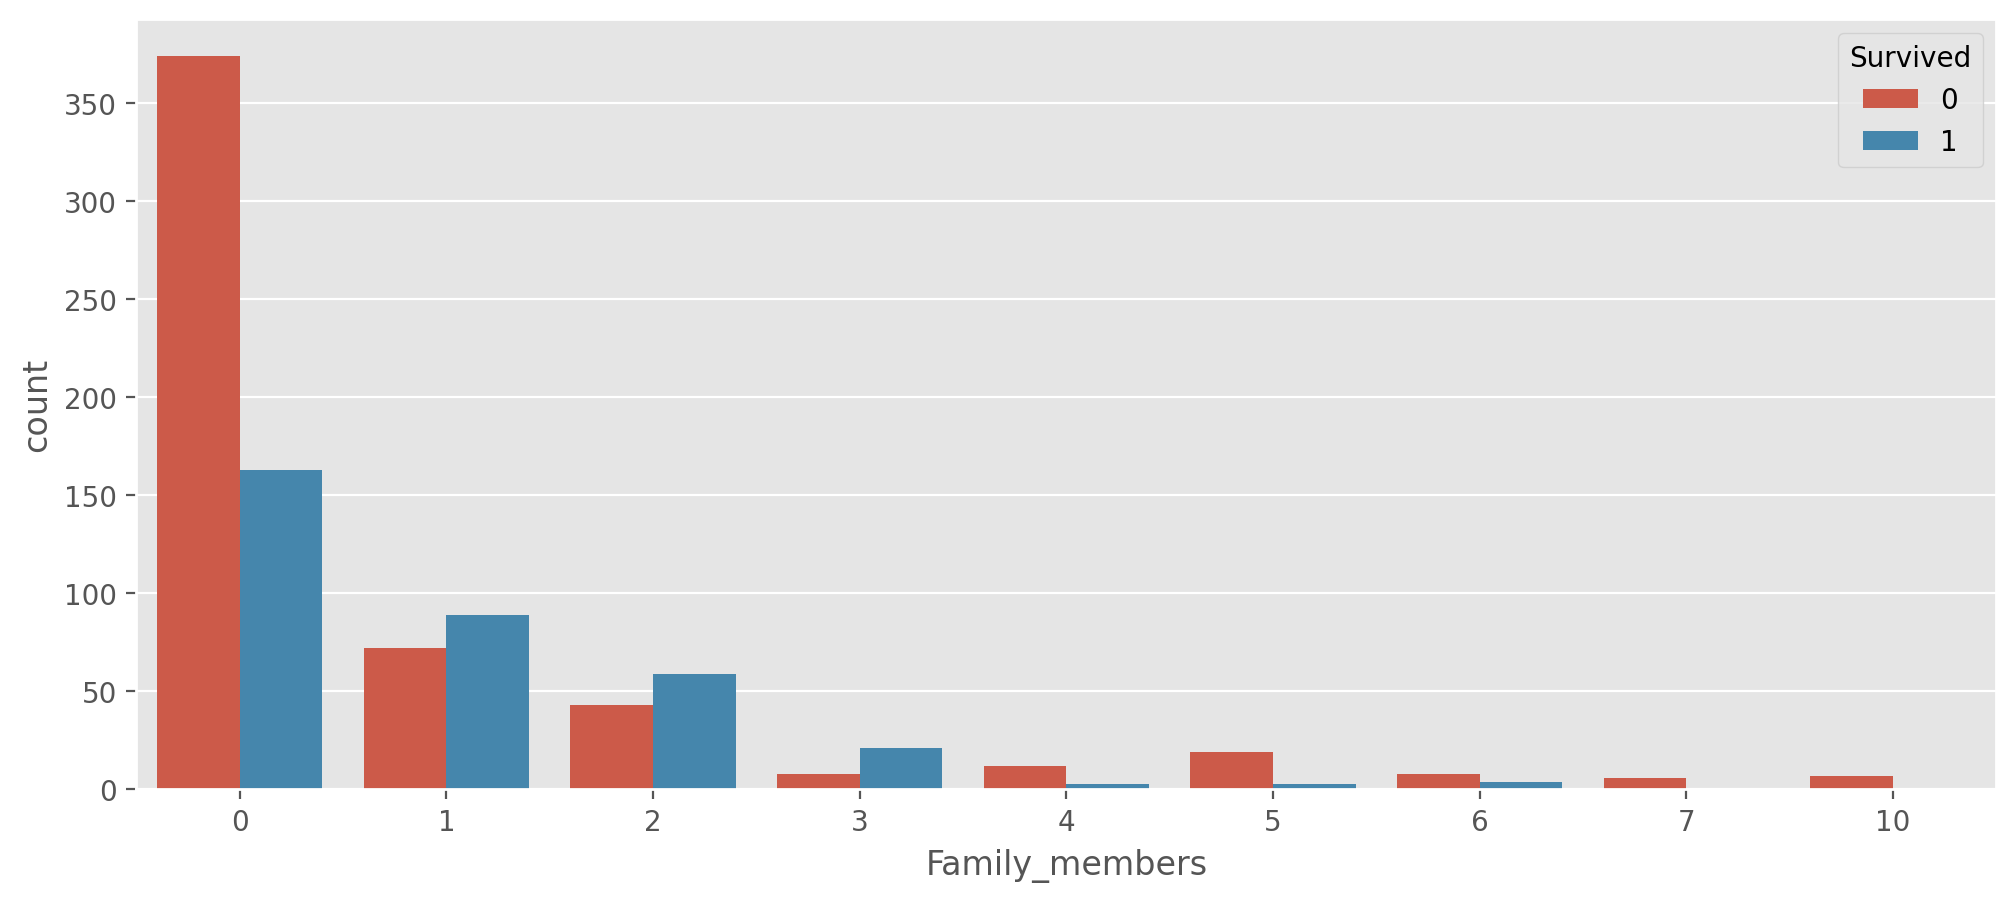

In [69]:
# Family memebers and survival both are categorical, hence we do countplot with hue
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Family_members', hue = 'Survived', data = tr)

In [70]:
# we can say having family memebers increases the chance of survival
# smaller familes 1, 2, 3 members survival rate was more, bigger families >4 survived less

# Now we will check whether the fair was associated with age or not

<Axes: xlabel='Age', ylabel='Fare'>

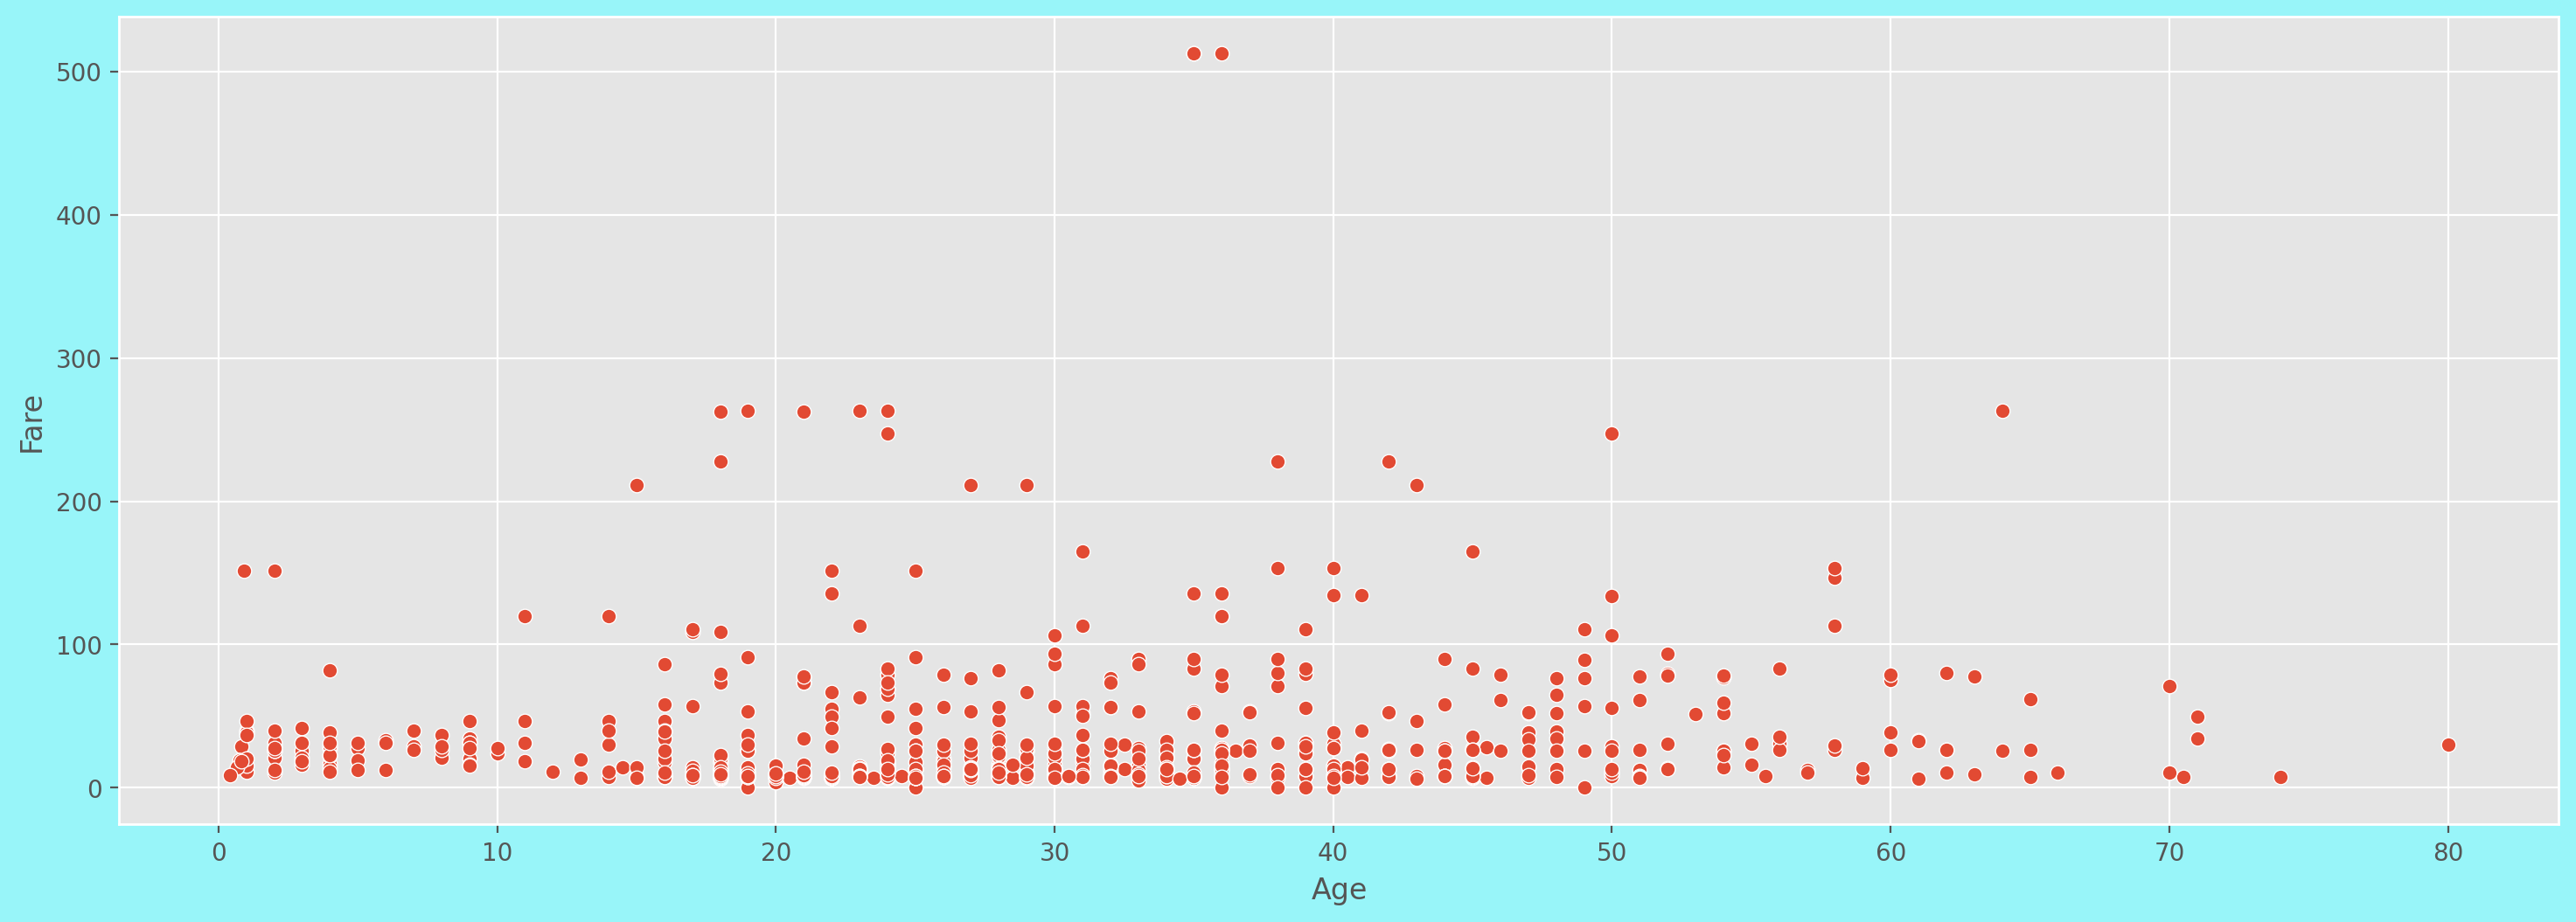

In [62]:
plt.figure(figsize = (18,6), dpi = 200, facecolor='#98F5F9')
sns.scatterplot(data=tr, x='Age',y='Fare')

In [64]:
# there is no trend therefore useless